In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np 
# import matplotlib.pyplot as plt

## Step 1 - Preprocessing

In [2]:
# Import & visualize dataset
df = pd.read_csv("./assets/data_warehouse/salaries_4_model.csv", delimiter=";", decimal=",")
df.head() 
df.dtypes

JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
PensionDebt         float64
TotalPayBenefits    float64
Year                  int64
dtype: object

In [3]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(478960, 9)
                JobTitle        BasePay    OvertimePay       OtherPay  \
count             478960  478960.000000  478960.000000  478960.000000   
unique              1810            NaN            NaN            NaN   
top     TRANSIT OPERATOR            NaN            NaN            NaN   
freq               31262            NaN            NaN            NaN   
mean                 NaN   75469.817047    6449.248849    3725.357381   
std                  NaN   49744.859572   14962.917669    7673.620109   
min                  NaN   -9942.330000  -22453.280000   -7058.590000   
25%                  NaN   39682.085000       0.000000       0.000000   
50%                  NaN   73161.025000       4.000000     776.800000   
75%                  NaN  107167.102500    5801.395000    4312.050000   
max                  NaN  620352.770000  374502.760000  400184.250000   

             Benefits       TotalPay    PensionDebt  TotalPayBenefits  \
count   478960.000000  478960.000000  

In [4]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "PensionDebt", "Year" ]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"TotalPayBenefits"] # We set "Salary" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



In [5]:
# Divide dataset Train set & Test set 

print("Splitting dataset into train set and test set...")
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


In [6]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  


print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [0,1,2,3,4,5]           # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [6] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
         BasePay  OvertimePay  OtherPay  Benefits  TotalPay  PensionDebt  Year
289726  71328.16     15650.72   2543.84  30778.05  89522.72          0.0  2018
160804  98157.00         0.00      0.00  33009.30  98157.00          0.0  2015
173377  56531.00      2301.41     11.95  24677.75  58844.36          0.0  2015
389594  45358.57         0.00   1308.93  19768.30  46667.50          0.0  2020
376387  93876.04      1856.81    474.11  35728.29  96206.96          0.0  2020

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
  -0.08363194  0.61619692 -0.15355708  0.32512468  0.06603006 -0.13890619]
 [ 0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   

## Step 2 - Build the model


In [7]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


Let's now test our model and see its predictions 

In [8]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[120300.77 131166.3   83522.11  66435.8  131935.25]



Apply the exact same process on the test set and compare performances. 

In [9]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
          BasePay  OvertimePay  OtherPay  Benefits   TotalPay  PensionDebt  \
257122   54560.25      3292.03   5744.44  20238.56   63596.72         0.00   
472714   19206.00       960.30    937.02   6643.12   21103.32         0.00   
87613    67041.00     11850.06   8902.75  28707.76   87793.81         0.00   
46601    95935.80        35.41    360.00  38280.06   96331.21         0.00   
216931   42575.09      1851.63   3827.45  21724.80   48254.17         0.00   
...           ...          ...       ...       ...        ...          ...   
8374    105489.01         0.00      0.00      0.00  105489.01         0.00   
403458  118299.97     33302.37  25517.74  48773.73  177120.08      5348.83   
233219  151587.33         0.00      0.00  47360.09  151587.33         0.00   
420405   71411.45     17099.86   4001.45  33351.19   92512.76         0.00   
66298    17085.00         0.00      0.00   6909.10   17085.00         0.00   

  

In [10]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 83835.28  27746.44 116501.57 134611.27  69978.97]



## Step 3 - Evaluate the model

In [11]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  1.0
R2 score on test set :  1.0


## Step 4 - Feature importance

* Check which features are important
* Check out model's coefficients! 


In [12]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [   4530.98240395    4530.98240395    4530.98240395    4530.98240395
    4530.98240395    4530.98240395    4530.98240395    4530.98240395
    4530.98240395    4530.98240395    4530.98240395    4530.98240395
  284256.96738062   85382.29805889   43798.51253391   17601.09205575
 -276255.84556142     839.78717435]
Constant is:  106291.30231408543


Now that we have the coefficients, we need to know which columns are associated with each one. If you look at `X_train` (or `X_test`), here is what you have:

In [13]:
X_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.08363194,  0.61619692, -0.15355708,
         0.32512468,  0.06603006, -0.13890619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.45532299, -0.43051736, -0.48521632,
         0.45189238,  0.21324996, -0.13890619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.38088677, -0.27659992, -0.48365831,
        -0.02146177, -0.45705529, -0.13890619],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        , -0.6053257 , -0.430

* Can we show it in a DataFrame? 
* We need to use the `.categories_` attribute from `OneHotEncoder` 
* Since we use `ColumnTransformer`, we need to access `OneHotEncoder` using `.transformers_` 

In [14]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [6]), ('num', StandardScaler(), [0, 1, 2, 3, 4, 5])]
One Hot Encoder transformer is:  OneHotEncoder()


Now we can simply check the categories

In [15]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)]


Now we can concatenate them with the numerical column names. We will use `numeric_features` variable to determine the name of our columns

In [16]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'],
      dtype='object')


Finally, we need to concatenate our `numerical_column_names` and our `categorical_column_names`. The easiest way to do it is by using [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)

In [17]:
# Append the columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'PensionDebt'], dtype=object)

Rank columns by importance using coefficients

In [18]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,2011,4530.982404
1,2012,4530.982404
2,2013,4530.982404
3,2014,4530.982404
4,2015,4530.982404
5,2016,4530.982404
6,2017,4530.982404
7,2018,4530.982404
8,2019,4530.982404
9,2020,4530.982404


<!-- Now you know that you model is: 

$y=23904\times YearsExperience + 2472 \times UK - 2182 \times Germany  -290\times France + 73498$

You can be very fancy and try to use `seaborn` to visualize feature importance 🌟 -->

c:\Users\phili\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


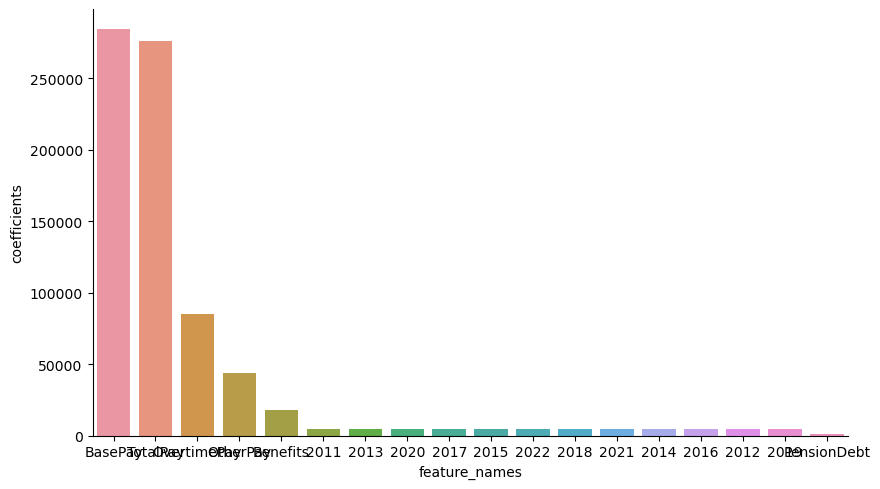

In [20]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
_ = sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph